In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
data = pd.read_csv("Dataset.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### NaN values

In [13]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## General exploration

In [9]:
survivors = data.Survived.sum()
unsurvivors = len(data) - survivors

print( survivors, 'people survived.')
print( unsurvivors, 'people did not survive.')

342 people survived.
549 people did not survive.


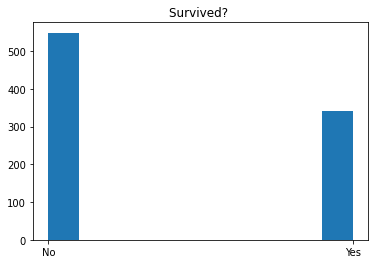

In [11]:
plt.hist(data.Survived)
plt.title('Survived? ')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

## Replacing NAN values

#### We have 3 columns that have nan values which are age, cabin, embarked

#### Embarked

In [22]:
## we'll just replace the missing by the majority category.
## we have only two missing valuse here

In [24]:
print(data.Embarked.isnull().sum())

2


#### Age

In [20]:
print(data.Age.isnull().sum() / len(data))

0.19865319865319866


We'll do it after doing some feature engineering

#### Cabin

In [21]:
print(data.Cabin.isnull().sum() / len(data))

0.7710437710437711


## Data Engineering

The dataset proposes 11 features:

PassengerId

Pclass: This is an ordered categorical variable.

Name: The name is like an idea, a unique identifier (as much name as IDs). 
We can't use the raw name as a feature. We can see that the title is present in the middle of the name.

Sex: Two categories. We can encode it using one-hot encoding.

Age: Numerical values, we'll need to fill the N/A values.

SibSp: number of sibling/spouse on board. Integer values

Parch: number of parent/children on board. Integer values

Ticket: Ticket number. There is less ticket numbers than IDs.

Fare: Fare of the ticket. Numerical value.

Cabin

Embarked: Port of embarkation. There are 4 values. Let's encode it with one-hot encoding.

## Analysis

### Categorical

In [26]:
data[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [28]:
data[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
data[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Being from Cherbourg is a factor a survival. Southampton decreases your chance of survival. This is surprising!

In [31]:
data[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [33]:
data[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


### Numerical

C:\Users\shady\venvs\AI_Diploma\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

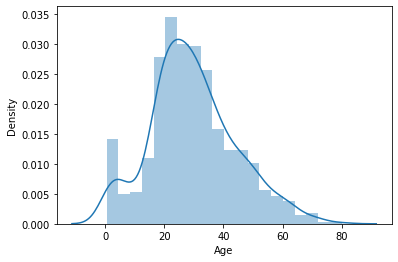

In [35]:
sns.distplot(data.Age.dropna())

C:\Users\shady\venvs\AI_Diploma\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

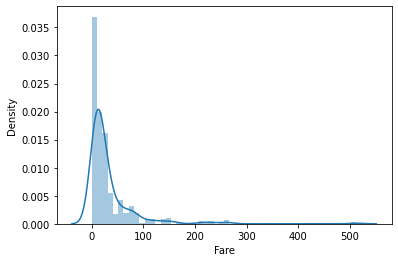

In [37]:
sns.distplot(data.Fare.dropna())

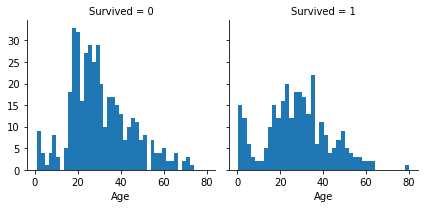

In [39]:
num = sns.FacetGrid(data, col='Survived')
print(num.map(plt.hist, 'Age', bins=40))

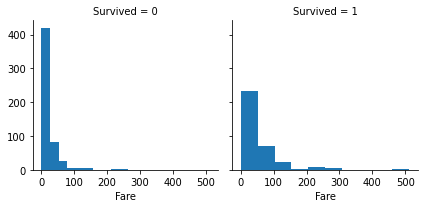

In [40]:
num = sns.FacetGrid(data, col='Survived')
print(num.map(plt.hist, 'Fare', bins=10))

## Feature Engineering

#### PassengerId

In [42]:
data.drop('PassengerId', axis = 1, inplace = True)

#### Pclass

In [44]:
mapping_pclass = {1:1, 2:0, 3:-1}
data['Pclass'] = data['Pclass'].map(mapping_pclass)

#### Name

In [45]:
def get_title(var):
    """
    This function takes as input the name and returns the title of the people. 
    
    """
    title = var.split(',')[1]
    title2 = title.split('.')[0]
    return title2[1:]

In [48]:
data['Title'] = data.apply(lambda x: get_title(x.Name), axis = 1)

In [50]:
print(data.groupby('Title').count().sort_values(by='Survived', ascending=False)['Pclass'])

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Pclass, dtype: int64


In [53]:
#mapping of the title
#the mapping is defined with the following dictionnary 

title_map = {'Mlle':'Miss','Ms':'Miss','Mlle':'Miss', 
             'Mme':'Mrs', 
             'Dr':'Other','Rev':'Other', 'Major':'Other', 'Col':'Other', 'Sir':'Other', 'Dona':'Other',
             'Capt':'Other', 'Lady':'Other','Jonkheer':'Other', 'Don':'Other', 'the Countess':'Other',
            'Mr':'Mr',
            'Miss':'Miss',
            'Mrs':'Mrs',
            'Master':'Master'}

data['Title'] = data['Title'].map(title_map)

data.drop('Name', axis=1, inplace = True)


In [54]:
data[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Other,0.347826
Mr,0.156673


#### Age

In [56]:
#these are the used categorical features

categs = ['Sex', 'Pclass', 'Title']



#this dataframe contains the age and the categorical values 
df_age = data[categs + ['Age']]

In [57]:
df_age

,Sex,Pclass,Title,Age
0,male,-1,Mr,22.0
1,female,1,Mrs,38.0
2,female,-1,Miss,26.0
3,female,1,Mrs,35.0
4,male,-1,Mr,35.0
...,...,...,...,...
886,male,0,Other,27.0
887,female,1,Miss,19.0
888,female,-1,Miss,NaN
889,male,1,Mr,26.0


In [59]:
#This dataframe enables us to compute the average age in function of the categorical variables 

df_age_mean = round(df_age.dropna().groupby(categs, as_index=True).median(),1)

def get_age(var, sex, pclass, title):
    """
    This function takes as input the categorical variables 
    and it returns the average age given the categorical variables 
    
    """
    if np.isnan(var):
        mean = df_age_mean['Age'][sex][pclass][title]
    else:
        mean = var
    return mean

In [60]:
df_age['Age2'] = df_age.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)

C:\Users\shady\AppData\Local\Temp\ipykernel_12676\2390405189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Age2'] = df_age.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)


In [66]:
df_age

,Sex,Pclass,Title,Age,Age2
0,male,-1,Mr,22.0,22.0
1,female,1,Mrs,38.0,38.0
2,female,-1,Miss,26.0,26.0
3,female,1,Mrs,35.0,35.0
4,male,-1,Mr,35.0,35.0
...,...,...,...,...,...
886,male,0,Other,27.0,27.0
887,female,1,Miss,19.0,19.0
888,female,-1,Miss,NaN,18.0
889,male,1,Mr,26.0,26.0


In [63]:
df_age.isnull().sum()

Sex         0
Pclass      0
Title       0
Age       177
Age2        0
dtype: int64

In [65]:
#filling the original dataframes
data['Age'] = data.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)


#### Parch & SibSp

We saw previously that we needed to perform transformation on these 2 series. Let's design new features:

Size of the Family: the number of on-board family members
isAlone: dummy equal to one if the passenger travels alone

In [67]:
def get_family_size(Parch, SibSp):
    """
    Return the size of the family 
    
    +1 comes from we need to add the person to the size of the family.
    
    """
    return Parch + SibSp + 1

In [69]:
data['FamilySize'] = data.apply(lambda x: get_family_size(x.Parch, x.SibSp), axis = 1)

In [70]:
data[["FamilySize", "Survived"]].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [71]:
def get_family_type(var):
    """
    take the size (integer) of the family and return a category (3 labels)
    
    """
    if var == 1:
        return 'alone'
    elif var<=4:
        return 'small'
    else:
        return 'big'

In [73]:
data['FamilyType'] = data.apply(lambda x: get_family_type(x.FamilySize), axis = 1)

In [75]:
data[["FamilyType", "Survived"]].groupby(['FamilyType']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilyType,
small,0.578767
alone,0.303538
big,0.161290


In [79]:
data.drop(['FamilySize', 'Parch', 'SibSp'], axis = 1, inplace=True)

#### Tickets

In [ ]:
data.drop('Ticket', axis = 1, inplace = True)

In [81]:
data

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilyType
0,0,-1,male,22.0,7.2500,NaN,S,Mr,small
1,1,1,female,38.0,71.2833,C85,C,Mrs,small
2,1,-1,female,26.0,7.9250,NaN,S,Miss,alone
3,1,1,female,35.0,53.1000,C123,S,Mrs,small
4,0,-1,male,35.0,8.0500,NaN,S,Mr,alone
...,...,...,...,...,...,...,...,...,...
886,0,0,male,27.0,13.0000,NaN,S,Other,alone
887,1,1,female,19.0,30.0000,B42,S,Miss,alone
888,0,-1,female,18.0,23.4500,NaN,S,Miss,small
889,1,1,male,26.0,30.0000,C148,C,Mr,alone


#### Fare & Cabin

In [83]:
data2 = data.copy()

In [84]:
data.drop(['Fare', 'Cabin'], axis = 1, inplace=True)

In [85]:
data

,Survived,Pclass,Sex,Age,Embarked,Title,FamilyType
0,0,-1,male,22.0,S,Mr,small
1,1,1,female,38.0,C,Mrs,small
2,1,-1,female,26.0,S,Miss,alone
3,1,1,female,35.0,S,Mrs,small
4,0,-1,male,35.0,S,Mr,alone
...,...,...,...,...,...,...,...
886,0,0,male,27.0,S,Other,alone
887,1,1,female,19.0,S,Miss,alone
888,0,-1,female,18.0,S,Miss,small
889,1,1,male,26.0,C,Mr,alone


In [87]:
data = pd.get_dummies(data, prefix = 'cat', drop_first=True)

In [88]:
data

,Survived,Pclass,Age,cat_male,cat_Q,cat_S,cat_Miss,cat_Mr,cat_Mrs,cat_Other,cat_big,cat_small
0,0,-1,22.0,1,0,1,0,1,0,0,0,1
1,1,1,38.0,0,0,0,0,0,1,0,0,1
2,1,-1,26.0,0,0,1,1,0,0,0,0,0
3,1,1,35.0,0,0,1,0,0,1,0,0,1
4,0,-1,35.0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,1,0,1,0,0,0,1,0,0
887,1,1,19.0,0,0,1,1,0,0,0,0,0
888,0,-1,18.0,0,0,1,1,0,0,0,0,1
889,1,1,26.0,1,0,0,0,1,0,0,0,0


In [ ]:
df.to_csv('file1.csv')